# Model evaluation

In [1]:
import torch
from torch.utils.data import DataLoader
import pandas as pd
from model_utils import UNet, test, calculate_summary_stats
from image_utils import CustomImageDataset, display_n_sampled_images, show_sampled_test_predictions


In [2]:
device = "cuda"
target_size = (64, 64)

class_mapping = {'Skyscraper': 1, 'Car': 2, 'Person': 3}
class_mapping_opposite = {0: 'Background', 1: 'Skyscraper', 2: 'Car', 3: 'Person'}

model = UNet().to(device)
model.load_state_dict(torch.load('model.pt'))

downloaded_annotations = pd.read_csv("downloaded_annotations.csv")

In [3]:
test_dataset = CustomImageDataset(image_dir="images/all", class_annotations=downloaded_annotations,  class_mapping=class_mapping, 
                                  transform=None, dataset_type="test", target_size=target_size)

test_dataloader = DataLoader(test_dataset, batch_size=1)

In [7]:
len(test_dataset)

1751

In [4]:
test_iou, inputs, actual_masks, outputs_mask, outputs_softmax = test(model, dataloader=test_dataloader)

Test Loss is: 0.5162515253688117


In [5]:
calculate_summary_stats(outputs_mask, actual_masks)

c:\Users\Ugne\Documents\studies\Python\DL-task1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ugne\Documents\studies\Python\DL-task1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ugne\Documents\studies\Python\DL-task1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.88      0.90      0.89   6026004
           1       0.97      0.02      0.03    201593
           2       0.41      0.56      0.47    744022
           3       0.00      0.00      0.00    200477

    accuracy                           0.82   7172096
   macro avg       0.56      0.37      0.35   7172096
weighted avg       0.81      0.82      0.80   7172096



## Examples

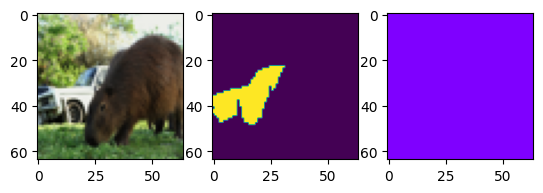

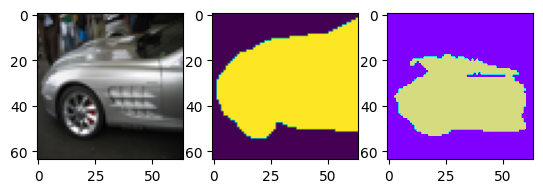

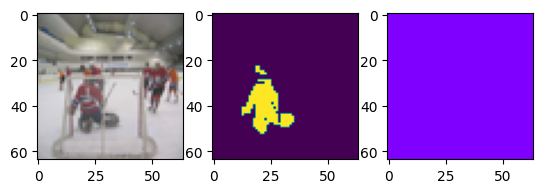

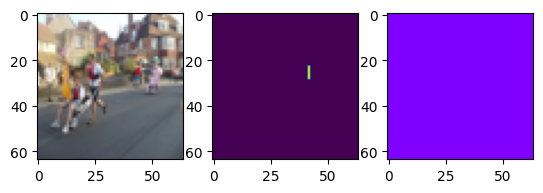

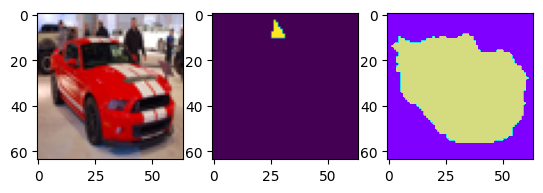

In [6]:
show_sampled_test_predictions(test_dataset, outputs_mask, 5)